#**Handwritten digits classification using Convolutional neural network**


> In this dataset, our goal is to correctly identify the digits from a dataset of tens of thousands of handwritten.Here we will be seeing how to classify them using the Convolutional Neural Network deep learning model.


***KRUTHI M***




#**Importing Libraries**

In [126]:
import numpy as np
from numpy import unique, argmax
import pandas as pd
from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets.mnist import load_data
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.utils import plot_model

%matplotlib inline

#**EDA**

> Containing Training samples = 60,000.

> Testing Samples = 10,000.

Tensorflow already contains MNIST dataset which can be added using keras.





**Splitting dataset into training and testing datsets**


In [127]:
# Loading the MNIST Dataset
(x_train,y_train), (x_test,y_test) = load_data()

In [128]:
#Reshaping the training and testing data
x_train = x_train.reshape((x_train.shape[0], x_train.shape[1], x_train.shape[2],1))
x_test = x_test.reshape((x_test.shape[0], x_test.shape[1], x_test.shape[2],1))


**Plotting the number of digits**

In [129]:
label=pd.Series(y_train) 
total=label.value_counts().sort_index()
Digits=pd.DataFrame(total,columns=['Total No. of digits'])
Digits

,Total No. of digits
0,5923
1,6742
2,5958
3,6131
4,5842
5,5421
6,5918
7,6265
8,5851
9,5949


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


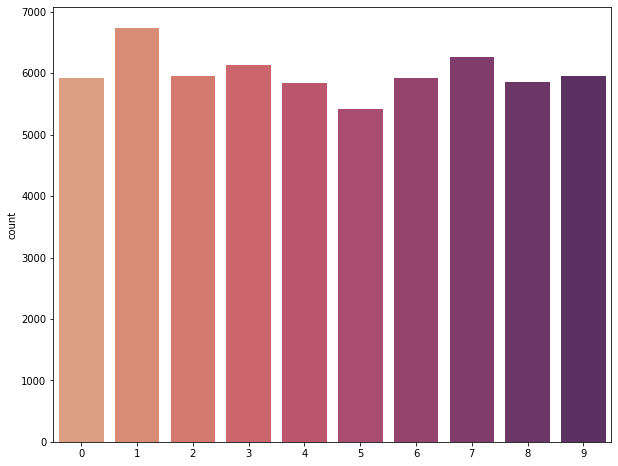

In [130]:
# Print data histogram
plt.figure(figsize = (10,8))

sns.countplot(y_train,palette="flare");

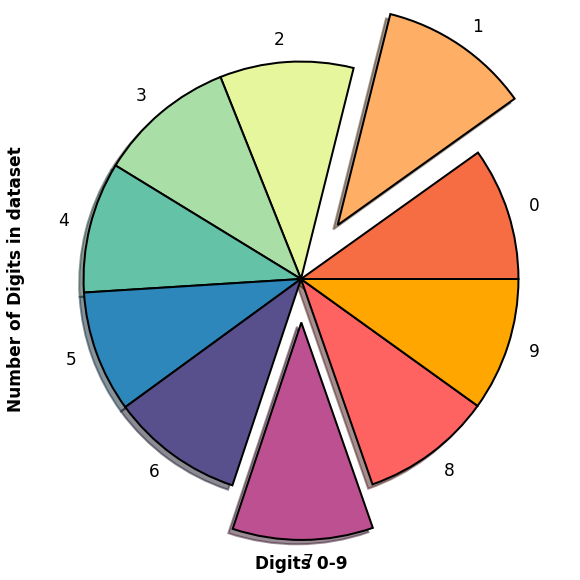

In [131]:
explode = (0, 0.3,0,0,0,0,0,0.2,0,0)
colors = ['#F66D44', '#FEAE65', '#E6F69D', '#AADEA7', '#64C2A6', '#2D87BB', '#58508D','#BC5090', '#FF6361', '#FFA600', ]
total.plot(kind='pie',figsize=(30,10),fontsize=17, colors=colors,explode=explode,shadow=True, wedgeprops = {"edgecolor" : "black",'linewidth': 2,'antialiased': True})
plt.xlabel("Digits 0-9",fontsize=17, weight='bold')
plt.ylabel("Number of Digits in dataset",fontsize=17,weight='bold')
plt.show()

**Preprocessing the data**

In [132]:
#Normalizing the values of pixels of images

x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

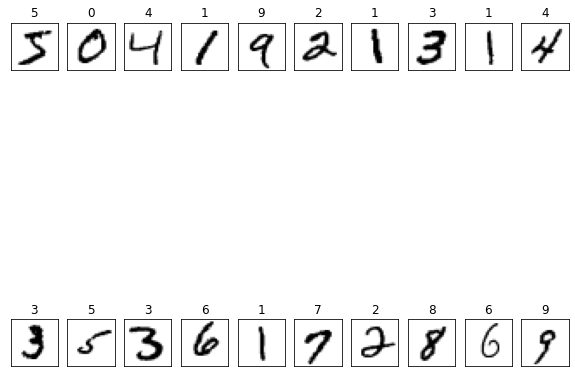

In [133]:
fig = plt.figure(figsize = (10,10))
for i in range(20):
  ax = fig.add_subplot(2,10, i+1, xticks = [], yticks=[])
  ax.imshow(np.squeeze(x_train[i]), cmap = 'binary')
  ax.set_title(y_train[i])

In [134]:
#determine the shape of the input image
img_shape = x_train.shape[1:]
print(img_shape)

(28, 28, 1)


**Constructing the CNN Model**

In [135]:
#Defining the CNN model
model = Sequential()

# First Convolutional layer
model.add(Conv2D(32, (3,3), activation='relu', input_shape =img_shape))
model.add(MaxPool2D((2,2)))

#Second Convolutional layer
model.add(Conv2D(48, (3,3), activation='relu'))
model.add(MaxPool2D((2,2)))

#Flattening the layers and adding Dropout function
model.add(Dropout(0.5))
model.add(Flatten())

#Dense layer
model.add(Dense(500, activation='relu'))

#Output layer
model.add(Dense(10, activation='softmax'))


In [136]:
#Getting the Model summary
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 11, 11, 48)        13872     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 5, 5, 48)          0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 5, 5, 48)          0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 1200)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 500)              

**Plotting the model we just created**

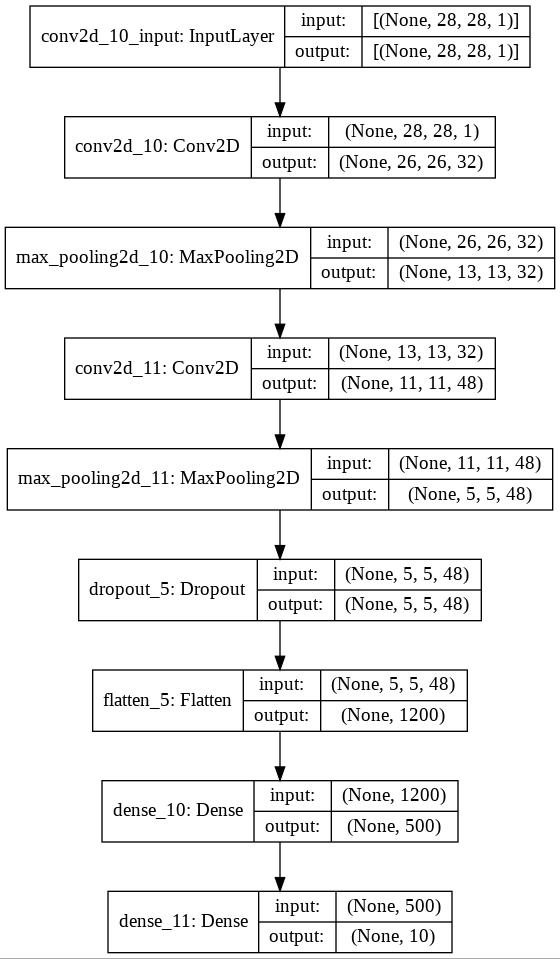

In [137]:
 plot_model(model, 'model.jpg', show_shapes=True)

**Compiling the model**

In [138]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics= ['accuracy'])
x = model.fit (x_train, y_train , epochs= 10, batch_size = 128, verbose=2, validation_split=0.1)

Epoch 1/10
422/422 - 40s - loss: 0.2374 - accuracy: 0.9293 - val_loss: 0.0605 - val_accuracy: 0.9838
Epoch 2/10
422/422 - 38s - loss: 0.0847 - accuracy: 0.9742 - val_loss: 0.0486 - val_accuracy: 0.9855
Epoch 3/10
422/422 - 38s - loss: 0.0594 - accuracy: 0.9817 - val_loss: 0.0407 - val_accuracy: 0.9887
Epoch 4/10
422/422 - 39s - loss: 0.0514 - accuracy: 0.9837 - val_loss: 0.0305 - val_accuracy: 0.9915
Epoch 5/10
422/422 - 39s - loss: 0.0401 - accuracy: 0.9874 - val_loss: 0.0309 - val_accuracy: 0.9910
Epoch 6/10
422/422 - 39s - loss: 0.0356 - accuracy: 0.9885 - val_loss: 0.0269 - val_accuracy: 0.9925
Epoch 7/10
422/422 - 39s - loss: 0.0327 - accuracy: 0.9895 - val_loss: 0.0292 - val_accuracy: 0.9920
Epoch 8/10
422/422 - 39s - loss: 0.0284 - accuracy: 0.9909 - val_loss: 0.0302 - val_accuracy: 0.9918
Epoch 9/10
422/422 - 38s - loss: 0.0270 - accuracy: 0.9912 - val_loss: 0.0310 - val_accuracy: 0.9907
Epoch 10/10
422/422 - 38s - loss: 0.0259 - accuracy: 0.9918 - val_loss: 0.0239 - val_accura

**Printing the accuracy of the model**

In [139]:
loss, accuracy = model.evaluate(x_test, y_test, verbose =0)
print(f'Accuracy: {accuracy*100}')

Accuracy: 99.34999942779541


**Plotting the Confusion matrix**

In [140]:
y_predicted = model.predict(x_test)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 978,    0,    0,    0,    0,    1,    0,    1,    0,    0],
       [   1, 1132,    1,    0,    0,    0,    0,    1,    0,    0],
       [   1,    0, 1026,    2,    1,    0,    0,    2,    0,    0],
       [   0,    2,    1,  999,    0,    4,    0,    1,    3,    0],
       [   0,    0,    0,    0,  977,    0,    3,    0,    0,    2],
       [   0,    0,    0,    3,    0,  888,    1,    0,    0,    0],
       [   2,    3,    0,    0,    1,    1,  951,    0,    0,    0],
       [   0,    0,    4,    0,    0,    0,    0, 1023,    1,    0],
       [   2,    0,    3,    0,    0,    1,    0,    1,  963,    4],
       [   0,    0,    0,    0,    4,    4,    0,    3,    0,  998]],
      dtype=int32)>

Text(69.0, 0.5, 'Truth')

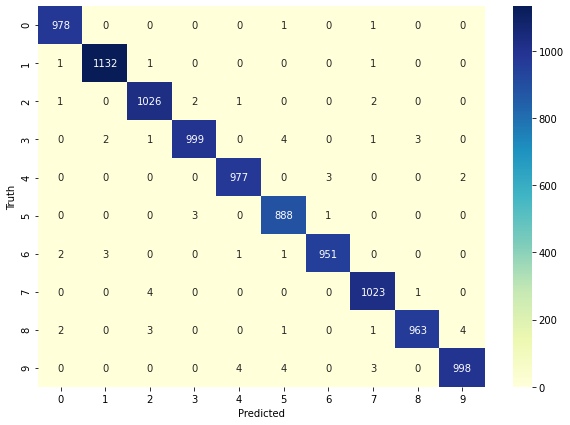

In [141]:
plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='d', cmap = 'YlGnBu')
plt.xlabel('Predicted')
plt.ylabel('Truth')

**Plotting the accuracy and loss of model**

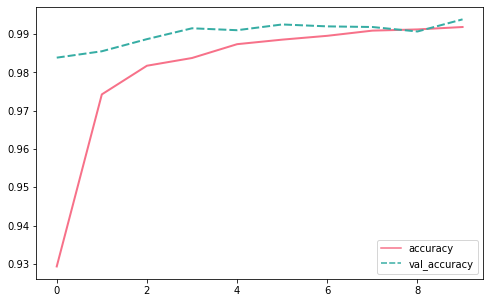

In [142]:
#Training and validation curves

#Accuracy
data1=pd.DataFrame(x.history)
plt.figure(figsize = (8,5))
sns.lineplot(data=data1[['accuracy','val_accuracy']],palette='husl',linewidth=2);



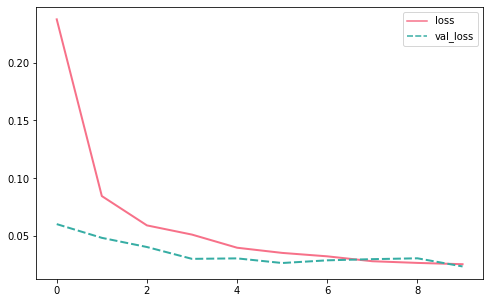

In [143]:
#Loss
plt.figure(figsize = (8,5))
sns.lineplot(data=data1[['loss','val_loss']],palette='husl',linewidth=2);


**Predicting the Digits**

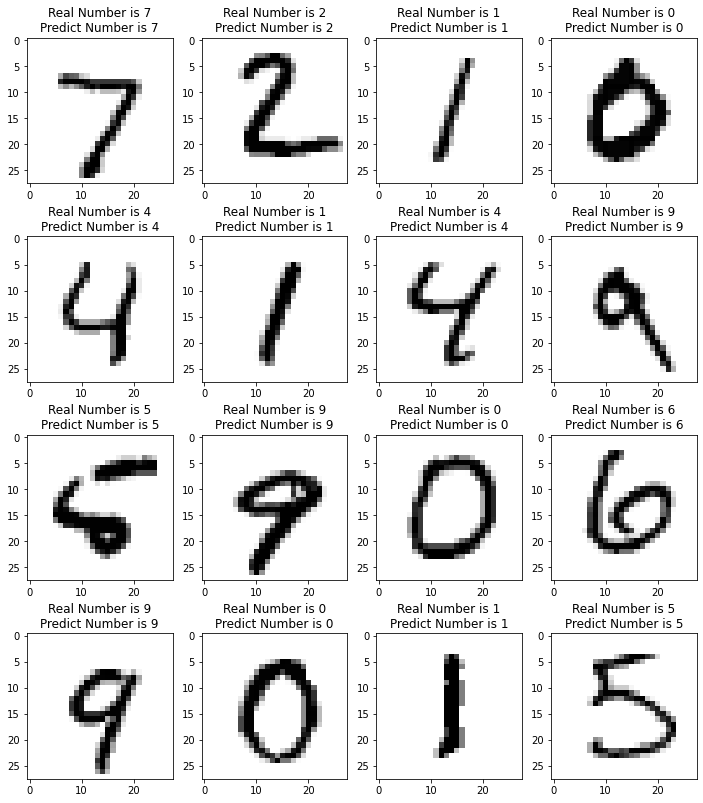

In [144]:
y_pred = model.predict(x_test)
x_test_ = x_test.reshape(x_test.shape[0], 28, 28)

fig, axis = plt.subplots(4, 4, figsize=(12, 14))
for i, ax in enumerate(axis.flat):
    ax.imshow(x_test_[i], cmap='binary')
    ax.set(title = f"Real Number is {y_test[i]}\nPredict Number is {y_pred[i].argmax()}");

**A popular dataset called MNIST was taken to make predictions of handwritten digits from 0 to 9. The dataset was cleaned, scaled, and shaped. Using TensorFlow, a CNN model was created and was eventually trained on the training dataset. Finally, predictions were made using the trained model.**

***As seen from the output we trained our model in 10 epoches and got accuracy of 99.34%***
